# Fitting Exponential Notebook

In [1]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
profile = pipeline.start(config)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
align_to = rs.stream.color
align = rs.align(align_to)

In [3]:
frames = pipeline.wait_for_frames()
aligned_frames = align.process(frames)
aligned_depth_frame = aligned_frames.get_depth_frame()
color_frame = aligned_frames.get_color_frame()
depth_image = np.asanyarray(aligned_depth_frame.get_data())
color_image = np.asanyarray(color_frame.get_data())

## Analyze Color Image

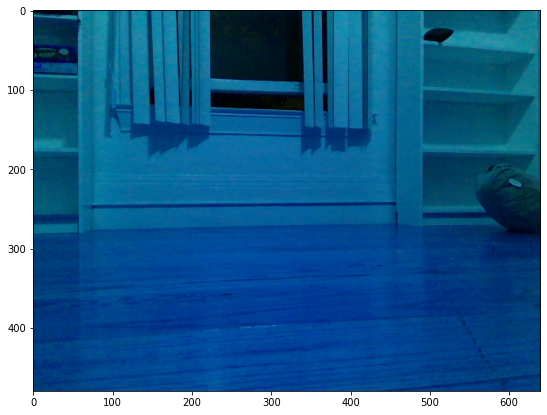

In [4]:
plt.figure(figsize=(10, 7))
plt.imshow(color_image)
plt.show()

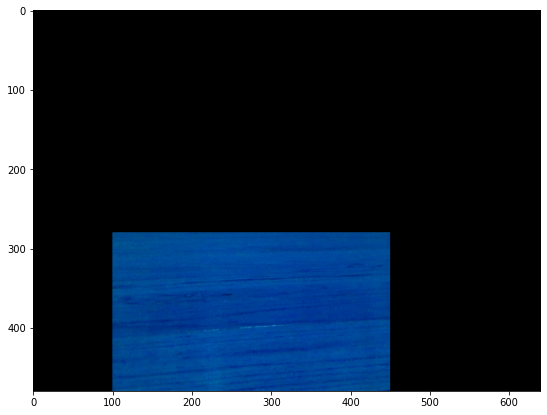

In [41]:
start = (280, 100)
end   = (480, 450)

edit_color = np.array(color_image)
edit_color[:start[0], :, :] = 0
edit_color[end[0]:  , :, :] = 0
edit_color[:, :start[1], :] = 0
edit_color[:,   end[1]:, :] = 0

plt.figure(figsize=(10, 7))
plt.imshow(edit_color)
plt.show()

## Getting Max Depths per Row

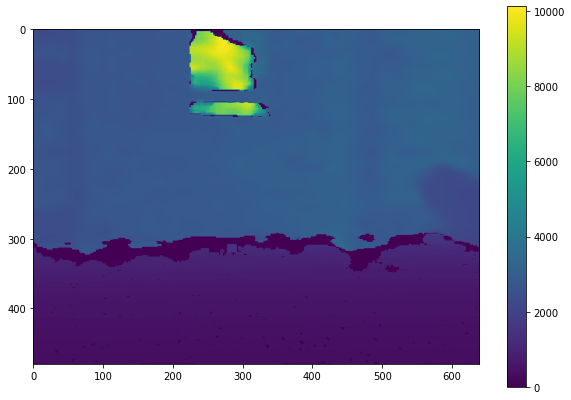

In [42]:
plt.figure(figsize=(10, 7))
plt.imshow(depth_image)
plt.colorbar()
plt.show()

In [45]:
depth_image.shape, color_image.shape

((480, 640), (480, 640, 3))

In [46]:
edit_depth = np.array(depth_image)
edit_depth[:start[0], :] = 0
edit_depth[end[0]:  , :] = 0
edit_depth[:, :start[1]] = 0
edit_depth[:,   end[1]:] = 0

In [52]:
xs = []
data = []
max_depth = 0
for i in range(edit_depth.shape[0] - 1, -1, -1):
    j = np.argmax(edit_depth[i,:])
    d = edit_depth[i][j]
    if d > max_depth and d > 0.001:
        max_depth = d
        xs.append(i)
        data.append(d)
        
xs = np.array(xs[::-1], dtype=np.float64)
data = np.array(data[::-1], dtype=np.float64)

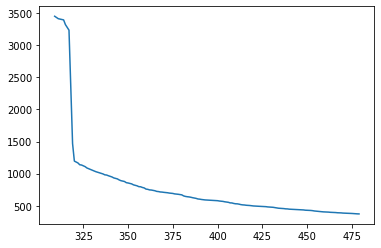

In [53]:
plt.plot(xs, data)
plt.show()

In [54]:
import exponential_model as exp_model

a, b, c ,p, q = exp_model.fit(xs, data)
pred_func = exp_model.construct_f(a, b, c, p, q)
rows = np.meshgrid(
    np.arange(depth_image.shape[1]), np.arange(depth_image.shape[0])
)[1]
preds = pred_func(rows)

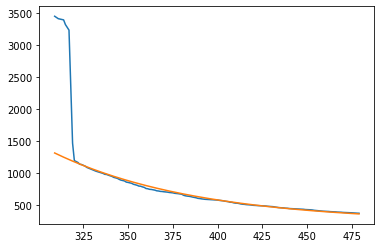

In [55]:
plt.plot(xs, data)
plt.plot(xs, pred_func(xs))
plt.show()

## Test Norm on Depth Image

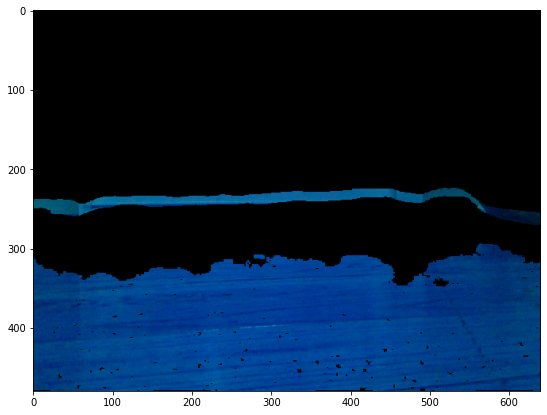

In [61]:
edit_color2 = np.array(color_image)
edit_color2[diff > 200] = 0

plt.figure(figsize=(10, 7))
plt.imshow(edit_color2)
plt.show()